In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = tf.constant(2.0)
y = tf.constant(8.0)
x = tf.Variable(10.0)

print(a)
print(x)

loss = tf.math.abs(a*x - y)
loss

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [6]:
loss.numpy()

12.0

In [3]:
def train_func():
    with tf.GradientTape() as tape:
        loss = tf.math.abs(a*x - y)

    dx = tape.gradient(loss, x)
    print(dx)
    print('x = {}, dx = {}'.format(x.numpy(), dx))

    x.assign(x - dx) # x = x - dx
# Run train_func() UDF repeately
for i in range(4):
    train_func()

tf.Tensor(2.0, shape=(), dtype=float32)
x = 10.0, dx = 2.0
tf.Tensor(2.0, shape=(), dtype=float32)
x = 8.0, dx = 2.0
tf.Tensor(2.0, shape=(), dtype=float32)
x = 6.0, dx = 2.0
tf.Tensor(0.0, shape=(), dtype=float32)
x = 4.0, dx = 0.0


GradientTape : https://www.tensorflow.org/guide/autodiff?hl=ko

In [6]:
%%time
# 데이터 집합 생성
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
# 계수 설정 : 초기값
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

# 학습
histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

    dw1, dw2, db = tape.gradient(loss, [w1, w2, b])

    w1.assign_sub(lr*dw1) # w1 = w1 - lr * dw1
    w2.assign_sub(lr*dw2)
    b.assign_sub(lr*db)

    histLoss.append(loss)
    if epoch % 500 == 0:
        print("epoch = {}, loss = {}".format(epoch, loss))


epoch = 0, loss = 15.339599609375
epoch = 500, loss = 3.654714584350586
epoch = 1000, loss = 2.3881609439849854
epoch = 1500, loss = 2.092434883117676
epoch = 2000, loss = 1.8692306280136108
epoch = 2500, loss = 1.6479507684707642
epoch = 3000, loss = 1.4266934394836426
epoch = 3500, loss = 1.2054352760314941
epoch = 4000, loss = 0.9841772317886353
epoch = 4500, loss = 0.7629194259643555
epoch = 5000, loss = 0.5416613221168518
epoch = 5500, loss = 0.32040339708328247
epoch = 6000, loss = 0.09914518892765045
epoch = 6500, loss = 0.06283099204301834
epoch = 7000, loss = 0.06285639107227325
epoch = 7500, loss = 0.06295356154441833
epoch = 8000, loss = 0.06295356154441833
epoch = 8500, loss = 0.06295356154441833
epoch = 9000, loss = 0.06295356154441833
epoch = 9500, loss = 0.06295356154441833
CPU times: user 9.56 s, sys: 32.8 ms, total: 9.59 s
Wall time: 9.6 s



추정 결과 :
w1 = 2.01
w2 = 3.00
b = 5.00
final loss = 0.0627


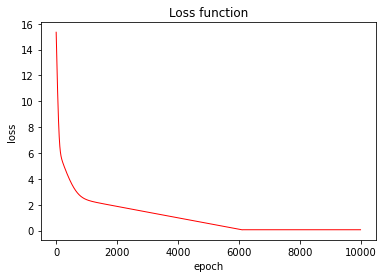

In [7]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# SGD + Momentum

In [12]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%%time
# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다.
opt = optimizers.SGD(learning_rate=0.001, momentum=0.7, nesterov=False)

histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

    grads = tape.gradient(loss, var_list)
    opt.apply_gradients(zip(grads, var_list))

    if epoch % 500 == 0:
        histLoss.append(loss.numpy())
        print("epoch = {}, loss = {:.4f}".format(epoch, loss))



epoch = 0, loss = 15.3396
epoch = 500, loss = 2.0233
epoch = 1000, loss = 1.2854
epoch = 1500, loss = 0.5479
epoch = 2000, loss = 0.0376
epoch = 2500, loss = 0.0376
epoch = 3000, loss = 0.0376
epoch = 3500, loss = 0.0376
epoch = 4000, loss = 0.0376
epoch = 4500, loss = 0.0376
epoch = 5000, loss = 0.0376
epoch = 5500, loss = 0.0376
epoch = 6000, loss = 0.0376
epoch = 6500, loss = 0.0376
epoch = 7000, loss = 0.0376
epoch = 7500, loss = 0.0376
epoch = 8000, loss = 0.0376
epoch = 8500, loss = 0.0376
epoch = 9000, loss = 0.0376
epoch = 9500, loss = 0.0376
CPU times: user 12.3 s, sys: 59.9 ms, total: 12.4 s
Wall time: 12.4 s


## ↳ 전체 걸리는 시간이 더 걸리더라도 수렴하는 속도가 빠르다


추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00
final loss = 0.0363


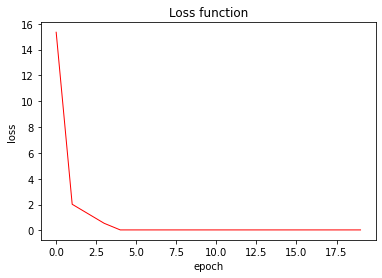

In [14]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Adam + minimize()

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [22]:
def loss_():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

opt = optimizers.Adam(learning_rate=0.01)

histLoss = []
for epoch in range(10000):
    opt.minimize(loss_, var_list=[w1, w2, b])

    histLoss.append(loss_())
    if epoch % 500 == 0:
        print("epoch: {}. loss = {} ".format(epoch, histLoss[-1]))

epoch: 0. loss = 0.09334443509578705 
epoch: 500. loss = 0.006673979572951794 
epoch: 1000. loss = 0.006656907498836517 
epoch: 1500. loss = 0.006615937687456608 
epoch: 2000. loss = 0.006606857758015394 
epoch: 2500. loss = 0.006601944100111723 
epoch: 3000. loss = 0.00660330057144165 
epoch: 3500. loss = 0.006628665141761303 
epoch: 4000. loss = 0.006659138482064009 
epoch: 4500. loss = 0.006659138482064009 
epoch: 5000. loss = 0.006659326143562794 
epoch: 5500. loss = 0.006659170612692833 
epoch: 6000. loss = 0.006659159902483225 
epoch: 6500. loss = 0.006659159902483225 
epoch: 7000. loss = 0.006657757796347141 
epoch: 7500. loss = 0.006657732184976339 
epoch: 8000. loss = 0.006659170612692833 
epoch: 8500. loss = 0.006658914033323526 
epoch: 9000. loss = 0.006658194120973349 
epoch: 9500. loss = 0.0066614518873393536 



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


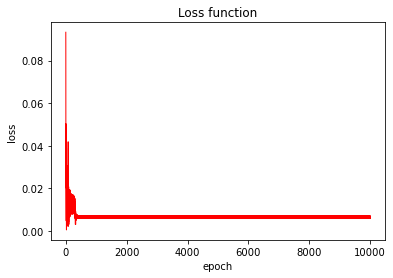

In [23]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras 
## Sequential model


Epoch 1/300
10/10 [==============================] - 0s 813us/step - loss: 332.3585
Epoch 2/300
10/10 [==============================] - 0s 440us/step - loss: 135.2794
Epoch 3/300
10/10 [==============================] - 0s 933us/step - loss: 58.9213
Epoch 4/300
10/10 [==============================] - 0s 627us/step - loss: 18.0927
Epoch 5/300
10/10 [==============================] - 0s 929us/step - loss: 7.9706
Epoch 6/300
10/10 [==============================] - 0s 472us/step - loss: 4.6484
Epoch 7/300
10/10 [==============================] - 0s 377us/step - loss: 3.2796
Epoch 8/300
10/10 [==============================] - 0s 884us/step - loss: 2.4829
Epoch 9/300
10/10 [==============================] - 0s 377us/step - loss: 1.7404
Epoch 10/300
10/10 [==============================] - 0s 1ms/step - loss: 1.1414
Epoch 11/300
10/10 [==============================] - 0s 382us/step - loss: 0.8188
Epoch 12/300
10/10 [==============================] - 0s 600us/step - loss: 0.4744
Epoch 13

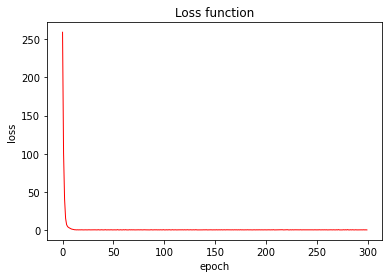

In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.
model = Sequential()
model.add(Dense(1, input_dim = 2))
model.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.05))
print(model)
print("")
h = model.fit(dataX, y, batch_size=10, epochs=300)
# 학습 결과를 확인한다.
parameters = model.layers[0].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Functional API

Epoch 1/300
10/10 [==============================] - 0s 472us/step - loss: 670.9030
Epoch 2/300
10/10 [==============================] - 0s 602us/step - loss: 377.2840
Epoch 3/300
10/10 [==============================] - 0s 606us/step - loss: 221.9218
Epoch 4/300
10/10 [==============================] - 0s 383us/step - loss: 129.8387
Epoch 5/300
10/10 [==============================] - 0s 812us/step - loss: 61.0708
Epoch 6/300
10/10 [==============================] - 0s 604us/step - loss: 35.6916
Epoch 7/300
10/10 [==============================] - 0s 482us/step - loss: 26.7256
Epoch 8/300
10/10 [==============================] - 0s 643us/step - loss: 19.2094
Epoch 9/300
10/10 [==============================] - 0s 301us/step - loss: 12.1000
Epoch 10/300
10/10 [==============================] - 0s 484us/step - loss: 10.4415
Epoch 11/300
10/10 [==============================] - 0s 483us/step - loss: 6.8605
Epoch 12/300
10/10 [==============================] - 0s 318us/step - loss: 4.5407

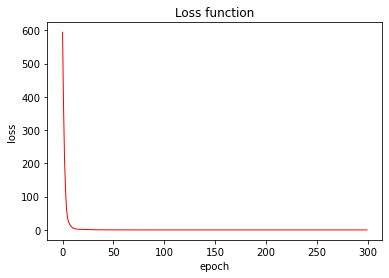

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.   
xInput = Input(batch_shape=(None, dataX.shape[1]))
yOutput = Dense(1)(xInput)
model = Model(xInput, yOutput)
model.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.05))

h = model.fit(dataX, y, batch_size=10, epochs=300, verbose=1)

# 학습 결과를 확인한다.
parameters = model.layers[1].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# tensorflow 1.4로 iris 분류

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# X와 y를 저장할 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수 수가 4개
y = tf.placeholder(tf.float32, [None, 3]) # 분류 클래스 수가 3개

In [ ]:
# Weight와 bias를 저장할 변수 선언
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [ ]:
# 출력을 정의
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [ ]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [ ]:
# 학습(훈련) 정의(옵티마이저, 학습률)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(init)

In [ ]:
for i in range(100000):
    _, loss_value = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i%10000 == 0:
        print(i, loss_value)

0 1.0986123
10000 0.34161025
20000 0.25733852
30000 0.21406321
40000 0.18752664
50000 0.16956551
60000 0.15657532
70000 0.14672598
80000 0.13898851
90000 0.13273858


In [ ]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778


# Keras 

In [ ]:
import tensorflow as tf

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Test Accuracy: 0.933


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:

%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


# Functional API

In [ ]:
i     = Input(shape=(n_features,)) # 입력레이어
n     = Dense(10)(i)
n     = Dense(8)(n)
o     = Dense(3, activation='softmax')(n) # 출력레이어
model = Model(inputs=i, outputs=o) # 모델을 만든다

In [ ]:
%time


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
